In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
import os
for dirpath, dirnames, filenames in os.walk('simpsons_dataset/'):
    print(dirpath, dirnames)

simpsons_dataset/ ['martin_prince', 'simpsons_dataset', 'charles_montgomery_burns', 'lionel_hutz', 'fat_tony', 'edna_krabappel', 'homer_simpson', 'rainier_wolfcastle', 'bart_simpson', 'nelson_muntz', 'waylon_smithers', 'mayor_quimby', 'lisa_simpson', 'comic_book_guy', 'patty_bouvier', 'chief_wiggum', 'snake_jailbird', 'agnes_skinner', 'gil', 'apu_nahasapeemapetilon', 'sideshow_mel', 'ned_flanders', 'moe_szyslak', 'barney_gumble', 'krusty_the_clown', 'abraham_grampa_simpson', 'professor_john_frink', 'carl_carlson', 'principal_skinner', 'marge_simpson', 'cletus_spuckler', 'miss_hoover', 'troy_mcclure', 'maggie_simpson', 'groundskeeper_willie', 'lenny_leonard', 'ralph_wiggum', 'milhouse_van_houten', 'otto_mann', 'disco_stu', 'sideshow_bob', 'kent_brockman', 'selma_bouvier']
simpsons_dataset/martin_prince []
simpsons_dataset/simpsons_dataset ['martin_prince', 'charles_montgomery_burns', 'lionel_hutz', 'fat_tony', 'edna_krabappel', 'homer_simpson', 'rainier_wolfcastle', 'bart_simpson', 'nel

In [3]:
import glob
paths = glob.glob("./simpsons_dataset/*/*/*.jpg")

len(paths), paths[0]

(20933, './simpsons_dataset/simpsons_dataset/martin_prince/pic_0066.jpg')

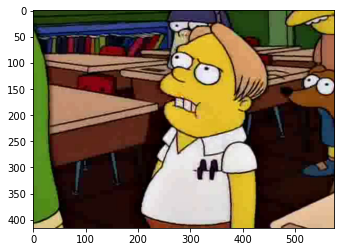

In [4]:
paths_0 = paths[0]
paths_0_ipg = plt.imread(paths_0)
plt.imshow(paths_0_ipg)

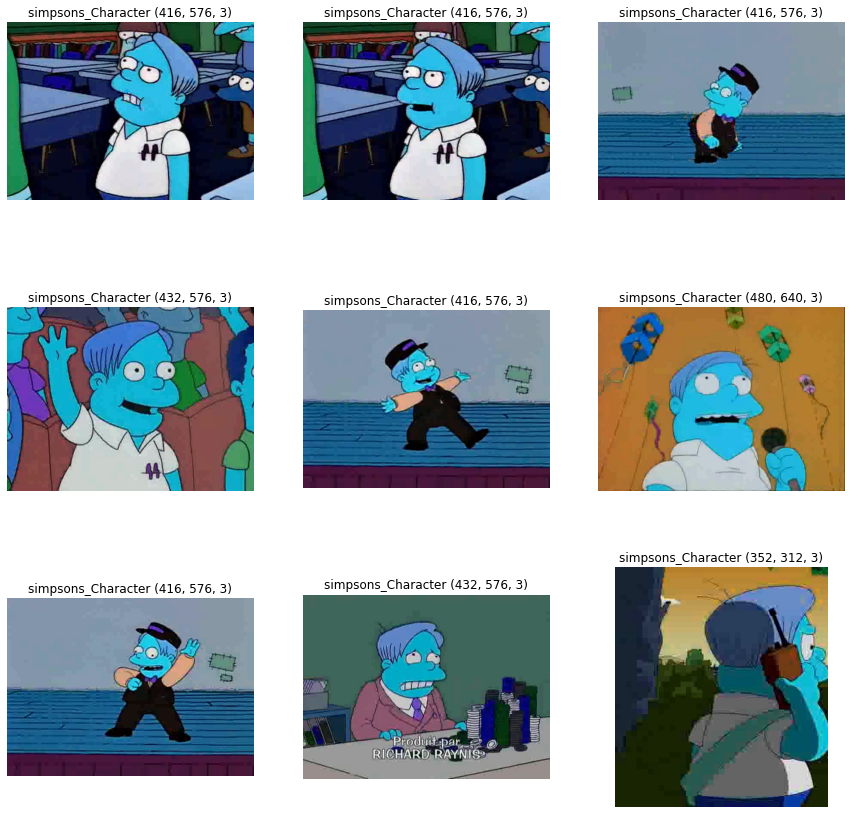

In [5]:
import cv2

plt.figure(figsize=(15, 15))
labels = "simpsons_Character"
for i, images in enumerate(paths[:9]):
    ax = plt.subplot(3, 3, i + 1)
    img = cv2.imread(images)
    plt.imshow(img)
    plt.title(f'{labels} {img.shape}')
    plt.axis("off")

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale = 1/ 255.0, validation_split =0.2)

In [7]:
width = 32
height = 32

In [8]:
trainData = datagen.flow_from_directory(directory = "simpsons_dataset/",
                                         target_size = (height, width),
                                         class_mode = 'binary',
                                         batch_size = 64,
                                         subset = 'training')

Found 33511 images belonging to 43 classes.


In [9]:
trainData.num_classes

43

In [10]:
trainData.classes

array([ 0,  0,  0, ..., 42, 42, 42], dtype=int32)

In [11]:
valDatagen = datagen.flow_from_directory(directory = 'simpsons_dataset/',
                                        target_size = (height, width),
                                        class_mode = 'binary',
                                        batch_size = 64,
                                        subset = 'validation')

Found 8355 images belonging to 43 classes.


In [13]:
from tensorflow.keras.applications.vgg16 import VGG16

vgg = VGG16(weights = 'imagenet', include_top=False, input_shape = (width, height,3))
model = Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'));

In [14]:
tf.keras.applications.vgg16.VGG16(
    include_top = True,
    weights= 'imagenet',
    input_tensor = None,
    input_shape = None,
    pooling = None,
    classes = 1000,
    classifier_activation = "softmax")

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 14,715,201
Trainable params: 14,715,201
Non-trainable params: 0
_________________________________________________________________


In [16]:
from tensorflow.keras.utils import plot_model
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
